In [2]:
import os
import pickle
import glob
import skimage
import skimage.transform
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

import sys

sys.path.append('../functions')

import chirp_functions as proc
%matplotlib inline

In [1]:
## STEP 1: PREPROCESS DATA
proc.preprocess_chirp(data_dir = '../../data/kagome-01.15.2022-1transducer/raw/central/', 
                       frequencies = np.linspace(1.0, 20.0, 951), 
                       targetfile = '../../data/kagome-machine/preprocessed/', 
                       title = 'scppos_', setno = 0)

NameError: name 'proc' is not defined

In [31]:
## 2D fourier transform - NEW!!!!!

from tqdm import tqdm

folder = "../../data/extkag16_machine/"

with open(folder + "preprocessed/_17.4_0.pkl",'rb') as f:
    real_data = pickle.load(f)

print(real_data)

L_kag = 0.008
L = L_kag*np.sqrt(3)/2*(np.sqrt(3)+1)
kxmax = 4*np.pi/(3*np.sqrt(3) * L)
kymax = 2*np.pi/(3*L)
kxs = np.linspace(-1.2*kxmax, 1.2*kxmax, 50)
kys = np.linspace(-1.2*kymax, 1.2*kymax, 50)

print(L)

G = [[0.0, 0.0], [6*np.pi/(3*np.sqrt(3) * L), 2*np.pi/(3*L)], [6*np.pi/(3*np.sqrt(3) * L), -2*np.pi/(3*L)], [0, 4*np.pi/(3*L)]]
print(G[1][0])

reciprocal_data = np.zeros((len(kxs), len(kys)))
reciprocal_raw = np.zeros((len(kxs), len(kys)), dtype=complex)

[[ 3.87846100e-02  2.23923050e-02  5.78128948e+01  1.40142681e-01]
 [ 3.27846100e-02  1.89282030e-02  2.97222809e+01 -1.79107027e+02]
 [ 4.57128130e-02  2.23923050e-02  6.13262362e+02  1.79927828e+02]
 ...
 [ 2.65740980e-01  4.03492268e-01  8.87150413e-19 -1.31390633e+02]
 [ 2.58812777e-01  4.03492268e-01  4.17796803e-18  7.13693466e+01]
 [ 2.55348675e-01  3.97492268e-01  3.14473801e-17  1.78459632e+02]]
0.018928203230275508
191.65045325940503


100%|██████████| 50/50 [01:42<00:00,  2.05s/it]


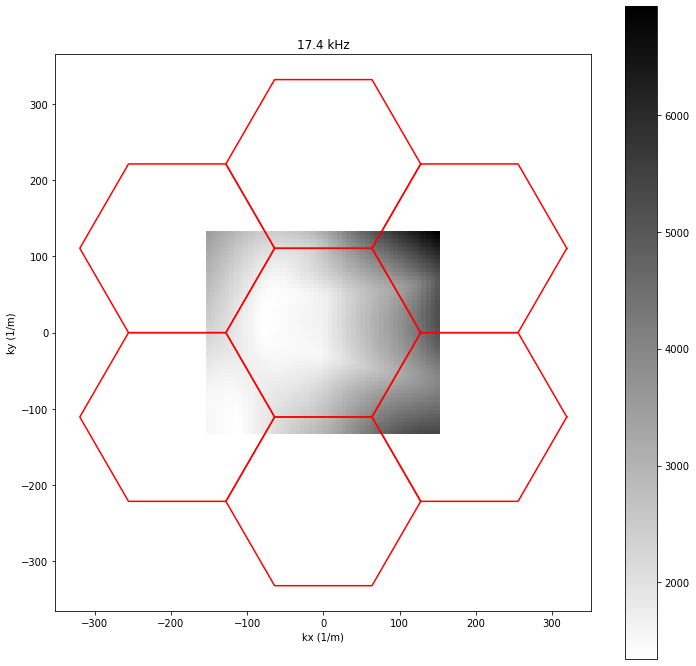

In [32]:
    
'''
Elements of real_data are assumed to look like:
    0: X in mm
    1: Y in mm
    2: Amplitude
    3: Phase in degrees

'''

for yi in tqdm(range(len(kys))):
    for xi in range(len(kxs)):
        for i in range(4):
            k_current=[kxs[xi] + G[i][0], kys[yi] + G[i][1]]
            raw = np.array(
                    [point[2] * np.exp(-1j * (k_current[0] * (point[0]) + k_current[1] * (point[1]) + (point[3] / 57.2957795131))) 
                        for point in real_data]).sum()
            amplitude = np.abs(raw)
            reciprocal_data[yi][xi] += amplitude
      

        

freq = 17.4
plt.figure(figsize=(12,12))
plt.imshow(reciprocal_data, cmap = 'binary', extent = [-1.2*kxmax, 1.2*kxmax, -1.2*kymax, 1.2*kymax], aspect = 'equal', origin = 'lower')

xBZ = np.zeros((7,7))
yBZ = np.zeros((7,7))

vec = np.array([[0,0], [np.sqrt(3), 1], [0, 2], [-np.sqrt(3),1], [-np.sqrt(3),-1], [0, -2], [np.sqrt(3),-1]])*kymax
xBZ[0] = [kxmax, 0.5*kxmax, -0.5*kxmax, -kxmax, -0.5*kxmax, 0.5*kxmax, kxmax]
yBZ[0] = [0, kymax, kymax, 0, -kymax, -kymax, 0]

for i in range(7):
    xBZ[i] = xBZ[0] + vec[i][0]
    yBZ[i] = yBZ[0] + vec[i][1]
    plt.plot(xBZ[i], yBZ[i], 'r-')


plt.xlabel("kx (1/m)")
plt.ylabel("ky (1/m)")
plt.title(str(freq)+" kHz")
plt.colorbar()

plt.savefig(folder + "fourier/figures/2D_DFT_{}kHz_NEW.png".format(freq))

100%|██████████| 100/100 [01:42<00:00,  1.02s/it]


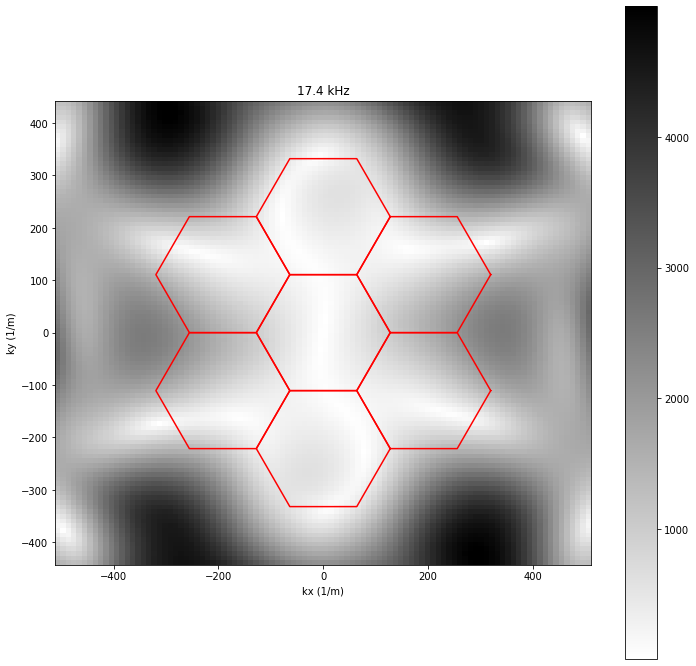

In [30]:
## 2D fourier transform - ORIGINAL!!!

from tqdm import tqdm

folder = "../../data/extkag16_machine/"

with open(folder + "preprocessed/_17.4_0.pkl",'rb') as f:
    real_data = pickle.load(f)



L_kag = 0.008
L = L_kag*np.sqrt(3)/2*(np.sqrt(3)+1)

kxmax = 4*np.pi/(3*np.sqrt(3) * L)
kymax = 2*np.pi/(3*L)
kxs = np.linspace(-4*kxmax, 4*kxmax, 100)
kys = np.linspace(-4*kymax, 4*kymax, 100)


reciprocal_data = np.zeros((len(kxs), len(kys)))
reciprocal_raw = np.zeros((len(kxs), len(kys)), dtype=complex)

    
'''
Elements of real_data are assumed to look like:
    0: X in mm
    1: Y in mm
    2: Amplitude
    3: Phase in degrees

'''


for yi in tqdm(range(len(kys))):
    for xi in range(len(kxs)):
        raw = np.array(
                [point[2] * np.exp(-1j * (kxs[xi] * (point[0]) + kys[yi] * (point[1]) + (point[3] / 57.2957795131))) 
                    for point in real_data]).sum()
        amplitude = np.abs(raw)
        reciprocal_data[yi][xi] = amplitude
        reciprocal_raw[yi][xi] = raw
      

        

freq = 17.4
plt.figure(figsize=(12,12))
plt.imshow(reciprocal_data, cmap = 'binary', extent = [-4*kxmax, 4*kxmax, -4*kymax, 4*kymax], aspect = 'equal', origin = 'lower')

xBZ = np.zeros((7,7))
yBZ = np.zeros((7,7))

vec = np.array([[0,0], [np.sqrt(3), 1], [0, 2], [-np.sqrt(3),1], [-np.sqrt(3),-1], [0, -2], [np.sqrt(3),-1]])*kymax
xBZ[0] = [kxmax, 0.5*kxmax, -0.5*kxmax, -kxmax, -0.5*kxmax, 0.5*kxmax, kxmax]
yBZ[0] = [0, kymax, kymax, 0, -kymax, -kymax, 0]

for i in range(7):
    xBZ[i] = xBZ[0] + vec[i][0]
    yBZ[i] = yBZ[0] + vec[i][1]
    plt.plot(xBZ[i], yBZ[i], 'r-')


plt.xlabel("kx (1/m)")
plt.ylabel("ky (1/m)")
plt.title(str(freq)+" kHz")
plt.colorbar()

plt.savefig(folder + "fourier/figures/2D_DFT_{}kHz_ORIGINAL.png".format(freq))







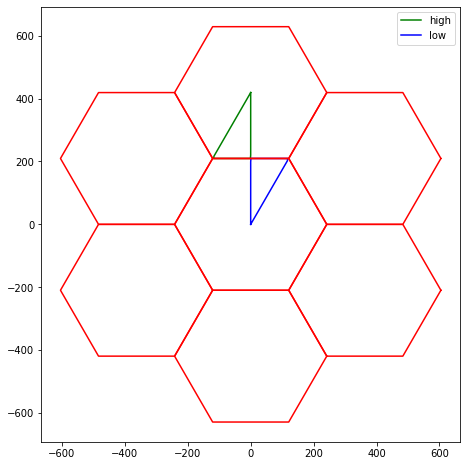

In [123]:
#GK'M'G sweeps

from tqdm import tqdm
import csv


freq_num = 650
freq_min = 2.0
freq_max = 17.0
freqs = np.array([(0, np.linspace(freq_min, freq_max, freq_num))], dtype=object)
freq_div1 = 8.5
freq_div2 = 13.0

L = 0.01
kxmax = 4*np.pi/(3*np.sqrt(3) * L)
kymax = 2*np.pi/(3*L)

b_res = 50
b = np.linspace(0, 1.5+np.sqrt(3)/2, b_res) #GKMG sweep parameter

kxb_low = np.zeros(len(b))
kyb_low = np.zeros(len(b))
kxb_high = np.zeros(len(b))
kyb_high = np.zeros(len(b))
kxb_flat = np.zeros(len(b))
kyb_flat = np.zeros(len(b))


for i in range(len(b)):
    if b[i] < 1:
        kxb_low[i] = b[i] * 2 * np.pi / (np.sqrt(3)*3 * L) 
        kyb_low[i] = b[i] * 2 * np.pi / (3 * L)
        kxb_high[i] = -b[i] * 2 * np.pi / (np.sqrt(3)*3 * L) 
        kyb_high[i] = 4 * np.pi / (3 * L) - b[i] * 2 * np.pi / (3 * L)
        kxb_flat[i] = 4 * np.pi / (3 * np.sqrt(3) * L) * b[i]
        kyb_flat[i] = 4 * np.pi / (3 * L)
    elif b[i] < 1.5: 
        kxb_low[i] = 2 * np.pi / (np.sqrt(3)*3 * L) - 2 * 2 * np.pi / (3 * np.sqrt(3) * L) * (b[i]-1)
        kyb_low[i] = 2 * np.pi / (3 * L) 
        kxb_high[i] = -2 * np.pi / (np.sqrt(3)*3 * L) + 2 * 2 * np.pi / (3 * np.sqrt(3) * L) * (b[i]-1)
        kyb_high[i] = 2 * np.pi / (3 * L) 
        kxb_flat[i] = 4 * np.pi / (3 * np.sqrt(3) * L) - 2 * np.pi / (3 * np.sqrt(3) * L) * (b[i]-1)
        kyb_flat[i] = 4 * np.pi / (3*L) + 2 * np.pi / (3 * L) * (b[i]-1)
    else:
        kxb_low[i] = 0
        kyb_low[i] = 2 * np.pi / (3 * L) - 2 * np.pi / (3 * L) *2 / np.sqrt(3) * (b[i]-1.5)
        kxb_high[i] = 0
        kyb_high[i] = 2 * np.pi / (3 * L) + 2 * np.pi / (3 * L) *2 / np.sqrt(3) * (b[i]-1.5)
        kxb_flat[i] = (1- (b[i] - 1.5) * 2 / np.sqrt(3)) * np.pi / (np.sqrt(3) * L)
        kyb_flat[i] = 4 * np.pi / (3*L) + (1- 2 / (np.sqrt(3)) * (b[i]-1.5)) * np.pi / (3 * L)
        




plt.figure(figsize=(8,8))
#plt.plot(kxb_flat, kyb_flat, 'm-',label='flat')
plt.plot(kxb_high, kyb_high, 'g-',label='high')
plt.plot(kxb_low, kyb_low, 'b-',label='low')
plt.legend()
ax = plt.gca()
ax.set_aspect('equal')

xBZ = np.zeros((7,7))
yBZ = np.zeros((7,7))

vec = np.array([[0,0], [np.sqrt(3), 1], [0, 2], [-np.sqrt(3),1], [-np.sqrt(3),-1], [0, -2], [np.sqrt(3),-1]])*kymax
xBZ[0] = [kxmax, 0.5*kxmax, -0.5*kxmax, -kxmax, -0.5*kxmax, 0.5*kxmax, kxmax]
yBZ[0] = [0, kymax, kymax, 0, -kymax, -kymax, 0]


for i in range(7):
    xBZ[i] = xBZ[0] + vec[i][0]
    yBZ[i] = yBZ[0] + vec[i][1]
    plt.plot(xBZ[i], yBZ[i], 'r-')


In [111]:
###Original

filename = '../../data/kagome_machine/preprocessed/'

reciprocal_data = np.zeros((freq_num, b_res))
a = 10*np.sqrt(3)/2
    
for setno, values in freqs:
    for j in tqdm(range(len(values))):
        with open(filename + '_' + str(values[j]) + '_' + str(setno) + '.pkl','rb') as f:
            real_data = pickle.load(f)
            
            if values[j] <= freq_div1:
                
                for i in range(b_res):
                    amplitude = np.abs(np.array(
                            [point[2] * np.exp(1j * (kxb_low[i] * (point[0]) + kyb_low[i] * (point[1]) + (point[3] / 57.2957795131))) 
                                for point in real_data]).sum())
                    reciprocal_data[j][i] = amplitude
                    
            else:
                
                for i in range(b_res):
                    amplitude = np.abs(np.array(
                            [point[2] * np.exp(1j * (kxb_high[i] * (point[0]) + kyb_high[i] * (point[1]) + (point[3] / 57.2957795131))) 
                                for point in real_data]).sum())
                    reciprocal_data[j][i] = amplitude
'''          
            else:
                for i in range(b_res):
                    amplitude = np.abs(np.array(
                            [point[2] * np.exp(1j * (kxb_flat[i] * (point[0] / 1000) + kyb_flat[i] * (point[1] / 1000) + (point[3] / 57.2957795131))) 
                                for point in real_data]).sum())
                    reciprocal_data[j][i] = amplitude
'''   

            







  0%|          | 0/650 [00:00<?, ?it/s]





  0%|          | 1/650 [00:00<03:28,  3.12it/s]





  0%|          | 2/650 [00:00<03:25,  3.16it/s]





  0%|          | 3/650 [00:00<03:21,  3.21it/s]





  1%|          | 4/650 [00:01<03:19,  3.24it/s]





  1%|          | 5/650 [00:01<03:17,  3.27it/s]





  1%|          | 6/650 [00:01<03:14,  3.31it/s]





  1%|          | 7/650 [00:02<03:12,  3.35it/s]





  1%|          | 8/650 [00:02<03:10,  3.37it/s]





  1%|▏         | 9/650 [00:02<03:12,  3.34it/s]





  2%|▏         | 10/650 [00:03<03:10,  3.37it/s]





  2%|▏         | 11/650 [00:03<03:08,  3.39it/s]





  2%|▏         | 12/650 [00:03<03:09,  3.37it/s]





  2%|▏         | 13/650 [00:03<03:08,  3.38it/s]





  2%|▏         | 14/650 [00:04<03:07,  3.39it/s]





  2%|▏         | 15/650 [00:04<03:06,  3.40it/s]





  2%|▏         | 16/650 [00:04<03:07,  3.38it/s]





  3%|▎         | 17/650 [00:05<03:06,  3.39it/s]





  3%|▎         | 18/650 [00:05<03:06,  3

 35%|███▍      | 225/650 [01:05<02:00,  3.52it/s]





 35%|███▍      | 226/650 [01:05<02:00,  3.52it/s]





 35%|███▍      | 227/650 [01:05<01:59,  3.54it/s]





 35%|███▌      | 228/650 [01:06<01:59,  3.53it/s]





 35%|███▌      | 229/650 [01:06<01:58,  3.54it/s]





 35%|███▌      | 230/650 [01:06<01:58,  3.55it/s]





 36%|███▌      | 231/650 [01:06<01:58,  3.55it/s]





 36%|███▌      | 232/650 [01:07<01:57,  3.55it/s]





 36%|███▌      | 233/650 [01:07<01:57,  3.55it/s]





 36%|███▌      | 234/650 [01:07<01:57,  3.55it/s]





 36%|███▌      | 235/650 [01:08<01:57,  3.54it/s]





 36%|███▋      | 236/650 [01:08<01:57,  3.53it/s]





 36%|███▋      | 237/650 [01:08<01:56,  3.54it/s]





 37%|███▋      | 238/650 [01:08<01:56,  3.55it/s]





 37%|███▋      | 239/650 [01:09<01:55,  3.55it/s]





 37%|███▋      | 240/650 [01:09<01:55,  3.55it/s]





 37%|███▋      | 241/650 [01:09<01:55,  3.53it/s]





 37%|███▋      | 242/650 [01:10<01:54,  3.55it/s]





 37%|███▋ 

 69%|██████▉   | 449/650 [02:10<00:58,  3.42it/s]





 69%|██████▉   | 450/650 [02:10<01:00,  3.29it/s]





 69%|██████▉   | 451/650 [02:10<01:01,  3.25it/s]





 70%|██████▉   | 452/650 [02:11<01:00,  3.27it/s]





 70%|██████▉   | 453/650 [02:11<01:00,  3.28it/s]





 70%|██████▉   | 454/650 [02:11<00:58,  3.32it/s]





 70%|███████   | 455/650 [02:12<00:58,  3.34it/s]





 70%|███████   | 456/650 [02:12<00:57,  3.37it/s]





 70%|███████   | 457/650 [02:12<00:57,  3.36it/s]





 70%|███████   | 458/650 [02:12<00:57,  3.31it/s]





 71%|███████   | 459/650 [02:13<00:58,  3.28it/s]





 71%|███████   | 460/650 [02:13<00:58,  3.26it/s]





 71%|███████   | 461/650 [02:13<00:57,  3.30it/s]





 71%|███████   | 462/650 [02:14<00:56,  3.31it/s]





 71%|███████   | 463/650 [02:14<00:56,  3.31it/s]





 71%|███████▏  | 464/650 [02:14<00:55,  3.32it/s]





 72%|███████▏  | 465/650 [02:15<00:55,  3.32it/s]





 72%|███████▏  | 466/650 [02:15<00:55,  3.30it/s]





 72%|█████

'          \n            else:\n                for i in range(b_res):\n                    amplitude = np.abs(np.array(\n                            [point[2] * np.exp(1j * (kxb_flat[i] * (point[0] / 1000) + kyb_flat[i] * (point[1] / 1000) + (point[3] / 57.2957795131))) \n                                for point in real_data]).sum())\n                    reciprocal_data[j][i] = amplitude\n'

/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "interpolation" which is no longer supported as of 3.3 and will become an error two minor releases later
/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "interpolation" which is no longer supported as of 3.3 and will become an error two minor releases later


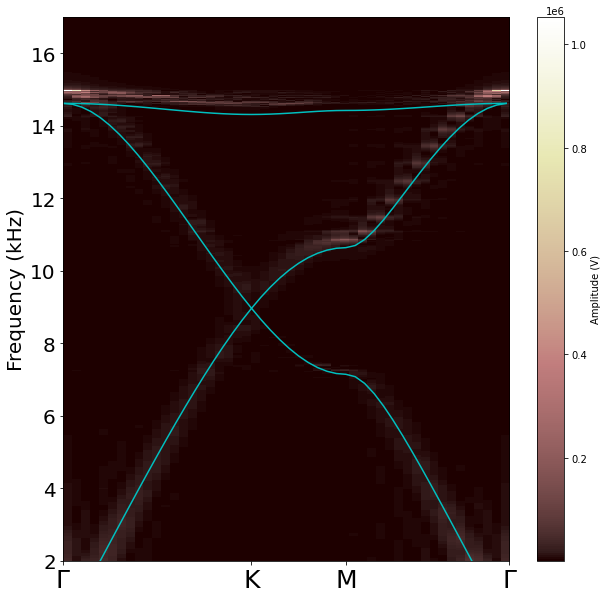

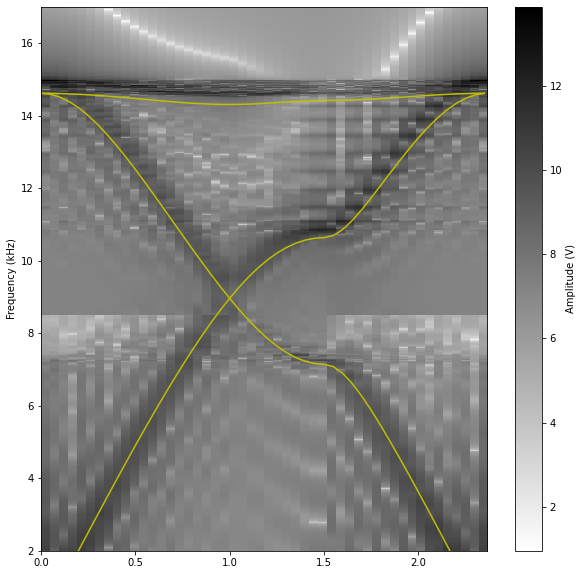

In [112]:
reciprocal_data_plot = np.zeros((freq_num, b_res))


for i in range(len(reciprocal_data)):
    reciprocal_data_plot[i] = reciprocal_data[i]#/np.average(reciprocal_data[i])
    #reciprocal_data_plot[i] = reciprocal_data[i]/reciprocal_data[i][0]
    #reciprocal_data_plot[i] = reciprocal_data[i]/reciprocal_data[i].max()



folder = '../../data/kagome_machine/'

b_sim = []
band1 = []
band2 = []
band3 = []

with open('../../data/simulation/kagome_machine_bands_clean.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    
    for row in reader:
        b_sim.append(float(row[0]))
        band1.append(float(row[1]))
        band2.append(float(row[2]))
        band3.append(float(row[3]))


    
# GKMG sweep
plt.figure(figsize = (10, 10))
color_map = plt.cm.get_cmap('pink')
reversed_magma = color_map.reversed()
plt.imshow(reciprocal_data_plot, cmap = 'pink', extent = [b[0], b[-1], freq_min, freq_max], aspect = 'auto', origin = 'lower', interpolation='none')
plt.plot(b_sim, band1, 'c-')
plt.plot(b_sim, band2, 'c-')
plt.plot(b_sim, band3, 'c-')
plt.colorbar(label = 'Amplitude (V)')
plt.ylabel("Frequency (kHz)", fontsize = 20)
plt.axis([b[0], b[-1], freq_min, freq_max])
plt.yticks(np.linspace(2, 16, 8), fontsize = 20)
plt.xticks([0, 1, 1.5, b[-1]], ['\u0393', 'K', 'M', '\u0393'], fontsize=25)
plt.savefig(folder + "fourier/figures/GK'M'G_sweep2_ORIGINAL", interpolation='none')


plt.figure(figsize = (10, 10))
plt.imshow(np.log(reciprocal_data_plot), cmap = 'binary', extent = [b[0], b[-1], freq_min, freq_max], aspect = 'auto', origin = 'lower', interpolation='none')
plt.colorbar(label = 'Amplitude (V)')
plt.plot(b_sim, band1, 'y-')
plt.plot(b_sim, band2, 'y-')
plt.plot(b_sim, band3, 'y-')
plt.ylabel("Frequency (kHz)")
plt.axis([b[0], b[-1], freq_min, freq_max])
plt.savefig(folder + "fourier/figures/GK'M'G_sweep2_binary_ORIGINAL", interpolation='none')

In [119]:
###New

filename = '../../data/kagome_machine/preprocessed/'

reciprocal_data = np.zeros((freq_num, b_res))
a = 10*np.sqrt(3)/2
    
for setno, values in freqs:
    for j in tqdm(range(len(values))):
        with open(filename + '_' + str(values[j]) + '_' + str(setno) + '.pkl','rb') as f:
            real_data = pickle.load(f)            
                
            for i in range(b_res):
                for k_no in range(4):
                    k_current = [kxb_low[i] + G[k_no][0], kyb_low[i] + G[k_no][1]]
                    amplitude = np.abs(np.array(
                            [point[2] * np.exp(1j * (k_current[0] * (point[0]) + k_current[1] * (point[1]) + (point[3] / 57.2957795131))) 
                                for point in real_data]).sum())
                    reciprocal_data[j][i] += amplitude
 

            

reciprocal_data_plot = np.zeros((freq_num, b_res))


for i in range(len(reciprocal_data)):
    reciprocal_data_plot[i] = reciprocal_data[i]








  0%|          | 0/650 [00:00<?, ?it/s]






  0%|          | 1/650 [00:01<12:28,  1.15s/it]






  0%|          | 2/650 [00:02<12:19,  1.14s/it]






  0%|          | 3/650 [00:03<12:12,  1.13s/it]






  1%|          | 4/650 [00:04<12:14,  1.14s/it]






  1%|          | 5/650 [00:05<12:03,  1.12s/it]






  1%|          | 6/650 [00:06<11:53,  1.11s/it]






  1%|          | 7/650 [00:07<11:49,  1.10s/it]






  1%|          | 8/650 [00:08<11:43,  1.10s/it]






  1%|▏         | 9/650 [00:09<11:37,  1.09s/it]






  2%|▏         | 10/650 [00:10<11:29,  1.08s/it]






  2%|▏         | 11/650 [00:12<11:23,  1.07s/it]






  2%|▏         | 12/650 [00:13<12:30,  1.18s/it]






  2%|▏         | 13/650 [00:14<12:07,  1.14s/it]






  2%|▏         | 14/650 [00:15<11:49,  1.12s/it]






  2%|▏         | 15/650 [00:16<11:37,  1.10s/it]






  2%|▏         | 16/650 [00:17<11:25,  1.08s/it]






  3%|▎         | 17/650 [00:18<11:20,  1.07s/it]






  3%|▎         | 18/6

 33%|███▎      | 213/650 [03:49<07:45,  1.07s/it]






 33%|███▎      | 214/650 [03:50<07:42,  1.06s/it]






 33%|███▎      | 215/650 [03:51<07:40,  1.06s/it]






 33%|███▎      | 216/650 [03:53<07:36,  1.05s/it]






 33%|███▎      | 217/650 [03:54<07:34,  1.05s/it]






 34%|███▎      | 218/650 [03:55<07:32,  1.05s/it]






 34%|███▎      | 219/650 [03:56<07:31,  1.05s/it]






 34%|███▍      | 220/650 [03:57<07:35,  1.06s/it]






 34%|███▍      | 221/650 [03:58<07:52,  1.10s/it]






 34%|███▍      | 222/650 [03:59<07:54,  1.11s/it]






 34%|███▍      | 223/650 [04:00<07:54,  1.11s/it]






 34%|███▍      | 224/650 [04:01<08:06,  1.14s/it]






 35%|███▍      | 225/650 [04:02<07:57,  1.12s/it]






 35%|███▍      | 226/650 [04:04<07:56,  1.12s/it]






 35%|███▍      | 227/650 [04:05<07:50,  1.11s/it]






 35%|███▌      | 228/650 [04:06<07:41,  1.09s/it]






 35%|███▌      | 229/650 [04:07<07:35,  1.08s/it]






 35%|███▌      | 230/650 [04:08<07:30,  1.07s/it

 65%|██████▌   | 425/650 [07:39<04:04,  1.09s/it]






 66%|██████▌   | 426/650 [07:40<04:07,  1.11s/it]






 66%|██████▌   | 427/650 [07:41<04:10,  1.12s/it]






 66%|██████▌   | 428/650 [07:42<04:08,  1.12s/it]






 66%|██████▌   | 429/650 [07:44<04:06,  1.11s/it]






 66%|██████▌   | 430/650 [07:45<04:07,  1.13s/it]






 66%|██████▋   | 431/650 [07:46<04:05,  1.12s/it]






 66%|██████▋   | 432/650 [07:47<04:00,  1.10s/it]






 67%|██████▋   | 433/650 [07:48<03:59,  1.10s/it]






 67%|██████▋   | 434/650 [07:49<04:19,  1.20s/it]






 67%|██████▋   | 435/650 [07:51<04:13,  1.18s/it]






 67%|██████▋   | 436/650 [07:52<04:03,  1.14s/it]






 67%|██████▋   | 437/650 [07:53<03:56,  1.11s/it]






 67%|██████▋   | 438/650 [07:54<03:51,  1.09s/it]






 68%|██████▊   | 439/650 [07:55<03:47,  1.08s/it]






 68%|██████▊   | 440/650 [07:56<03:44,  1.07s/it]






 68%|██████▊   | 441/650 [07:57<03:41,  1.06s/it]






 68%|██████▊   | 442/650 [07:58<03:39,  1.05s/it

 98%|█████████▊| 637/650 [11:34<00:15,  1.16s/it]






 98%|█████████▊| 638/650 [11:35<00:14,  1.18s/it]






 98%|█████████▊| 639/650 [11:36<00:12,  1.15s/it]






 98%|█████████▊| 640/650 [11:37<00:11,  1.14s/it]






 99%|█████████▊| 641/650 [11:38<00:10,  1.15s/it]






 99%|█████████▉| 642/650 [11:39<00:09,  1.14s/it]






 99%|█████████▉| 643/650 [11:41<00:07,  1.12s/it]






 99%|█████████▉| 644/650 [11:42<00:06,  1.13s/it]






 99%|█████████▉| 645/650 [11:43<00:05,  1.13s/it]






 99%|█████████▉| 646/650 [11:44<00:04,  1.12s/it]






100%|█████████▉| 647/650 [11:45<00:03,  1.10s/it]






100%|█████████▉| 648/650 [11:46<00:02,  1.10s/it]






100%|█████████▉| 649/650 [11:47<00:01,  1.09s/it]






100%|██████████| 650/650 [11:48<00:00,  1.09s/it]


/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "interpolation" which is no longer supported as of 3.3 and will become an error two minor releases later


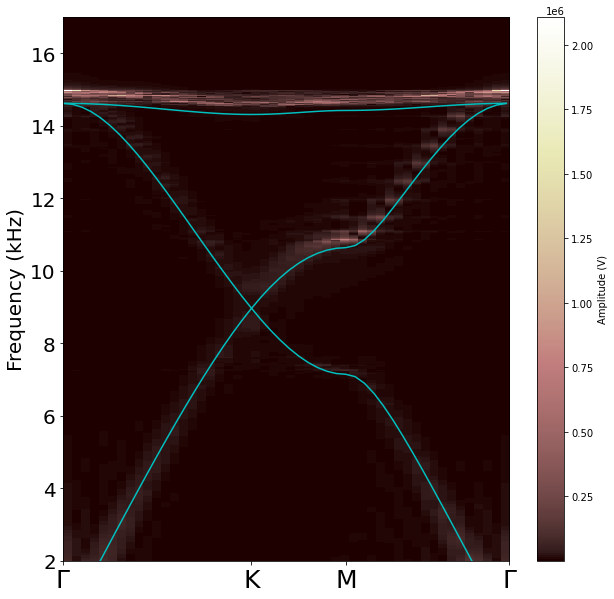

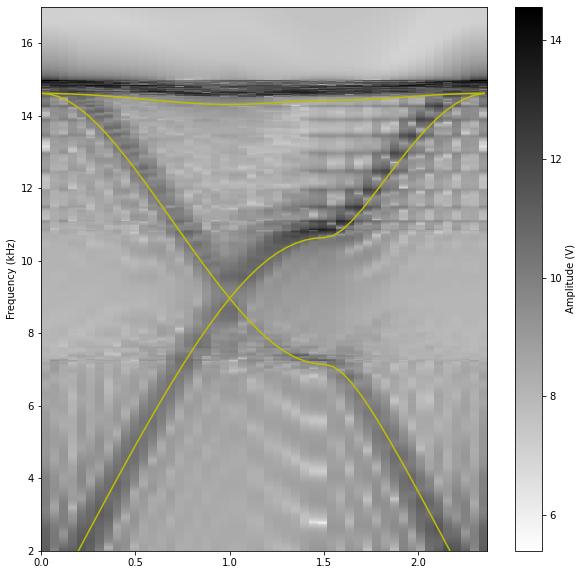

In [121]:
folder = '../../data/kagome_machine/'

b_sim = []
band1 = []
band2 = []
band3 = []

with open('../../data/simulation/kagome_machine_bands_clean.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    
    for row in reader:
        b_sim.append(float(row[0]))
        band1.append(float(row[1]))
        band2.append(float(row[2]))
        band3.append(float(row[3]))


    
# GKMG sweep
plt.figure(figsize = (10, 10))
color_map = plt.cm.get_cmap('inferno')
reversed_magma = color_map.reversed()
plt.imshow(reciprocal_data_plot, cmap = 'pink', extent = [b[0], b[-1], freq_min, freq_max], aspect = 'auto', origin = 'lower', interpolation='none')
plt.plot(b_sim, band1, 'c-')
plt.plot(b_sim, band2, 'c-')
plt.plot(b_sim, band3, 'c-')
plt.colorbar(label = 'Amplitude (V)')
plt.ylabel("Frequency (kHz)", fontsize = 20)
plt.axis([b[0], b[-1], freq_min, freq_max])
plt.yticks(np.linspace(2, 16, 8), fontsize = 20)
plt.xticks([0, 1, 1.5, b[-1]], ['\u0393', 'K', 'M', '\u0393'], fontsize=25)
plt.savefig(folder + "fourier/figures/GK'M'G_sweep2_NEW", interpolation='none')


plt.figure(figsize = (10, 10))
plt.imshow(np.log(reciprocal_data_plot), cmap = 'binary', extent = [b[0], b[-1], freq_min, freq_max], aspect = 'auto', origin = 'lower', interpolation='none')
plt.colorbar(label = 'Amplitude (V)')
plt.plot(b_sim, band1, 'y-')
plt.plot(b_sim, band2, 'y-')
plt.plot(b_sim, band3, 'y-')
plt.ylabel("Frequency (kHz)")
plt.axis([b[0], b[-1], freq_min, freq_max])
plt.savefig(folder + "fourier/figures/GK'M'G_sweep2_binary_NEW")

../../data/kagome-01.15.2022-1transducer/


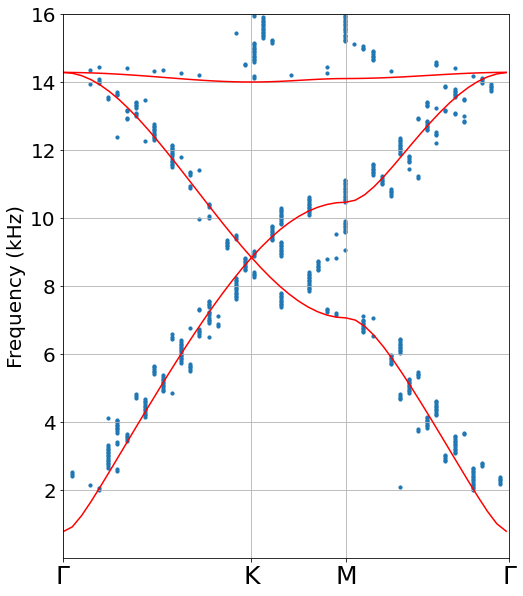

In [65]:
# Find peaks in the band structure and scatter them

from scipy.signal import find_peaks

peaks = []
peak_count = 2

freqs = np.linspace(freq_min, freq_max, freq_num)

scatterX = []
scatterY = []

folder = '../../data/kagome-01.15.2022-1transducer/'

for i in range(300): #214-428: 12-18 kHZ
    
    def peakValue(index):
        return reciprocal_data[i][index]

    peak_indices, _ = find_peaks(reciprocal_data[i])
    peak_indices = list(peak_indices)
    peak_indices.sort(key = peakValue, reverse = True)
    
    for j in range(peak_count):
        scatterX.append(b[peak_indices[j]])
        scatterY.append(freqs[i])

plt.figure(figsize=(8,10))
plt.plot(b_sim, np.array(band1), 'r-')
plt.plot(b_sim, np.array(band2), 'r-')
plt.plot(b_sim, np.array(band3), 'r-')
plt.scatter(scatterX, np.array(scatterY), 10)
plt.ylabel("Frequency (kHz)", fontsize = 20)
plt.axis([b[0], b[-1], freq_min/1000, freq_max/1000])
plt.yticks(np.linspace(2, 16, 8), fontsize = 20)
plt.yticks(np.linspace(2, 16, 8), fontsize = 20)
plt.xticks([0, 1, 1.5, b[-1]], ['\u0393', 'K', 'M', '\u0393'], fontsize=25)
plt.grid()
plt.savefig(folder + "fourier/figures/GKMG_sweep2_peaks_2_new" + str(peak_count))

# GKMG sweep




        
print(folder)

0.267824


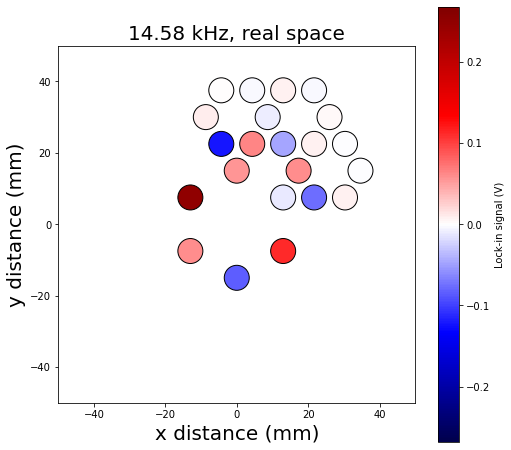

In [18]:
# Animating chirp scans

from matplotlib import patches as ptc
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors as colors


kagome_lattice = [((-0.8660,  0.0000), 0.35),
                ((-0.4330,  0.750), 0.35),
                (( 0.4330,  0.750), 0.35),
                (( 0.8660,  0.0000), 0.35),
                (( 0.4330, -0.750), 0.35),
                ((-0.4330, -0.750), 0.35)]


folder = "../../data/kagome-01.15.2022-1transducer/"

with open(folder + "preprocessed/_14580.0_0.pkl",'rb') as f:
    real_data = pickle.load(f)    
    

lattice_offset = kagome_lattice[4][0]
unit_cell = 10.0
radius = kagome_lattice[0][1]*unit_cell

amp = real_data[:, 2]
amp = amp.tolist()
max_amp = max(amp)
#max_amp = 1.0

freq = 14.58
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_aspect("equal")
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_xlabel("x distance (mm)", fontsize=20)
ax.set_ylabel("y distance (mm)", fontsize=20)
ax.set_title(str(freq) + " kHz, real space", fontsize=20)
cbar = fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-max_amp, vmax=max_amp), cmap = "seismic"), ax=ax, label="Lock-in signal (V)")

cavities = []
ampdata = []
phasedata = []
t = 0
dt = 0.1

for point in real_data:
    x_center = point[0]
    y_center = point[1]
    
    if (y_center == 12 * 7.5) and (x_center > 75) and (x_center < 90):
        print("transducer 1 phase: " + str(point[3]))
    
    if (y_center == 12 * 7.5) and (x_center > 90) and (x_center < 105):
        print("transducer 2 phase: " + str(point[3]))
    
    #ampdata.append(np.sqrt(point[2])*np.sqrt(max_amp))
    ampdata.append(point[2])
    phasedata.append(point[3])
    

    
    pressure = ampdata[-1]*np.sin(np.deg2rad(phasedata[-1]))
    #pressure = np.sin(np.deg2rad(phasedata[-1]))

    circle = ptc.Ellipse((x_center, y_center), 
                     width = radius*2, 
                     height = radius*2, 
                     edgecolor='black', facecolor = plt.cm.seismic((pressure+max_amp)/(2.0*max_amp)),
                     fill = True, alpha = 1)
    cavities.append(circle)
    ax.add_patch(cavities[-1])
    
def init():
    """initialize animation"""
    global cavities, t
    
    t = 0
    
    for i in range(len(cavities)):
        pressure = ampdata[i]*np.sin(np.deg2rad(phasedata[i])+t)
        #pressure = np.sin(np.deg2rad(phasedata[i]) + t)
        
        cavities[i].set_facecolor(plt.cm.seismic((pressure+max_amp)/(2.0*max_amp)))
                             
    return cavities
    
def animate(j):
    global t, dt, cavities, ampdata, phasedata
    t += dt
                            
    for i in range(len(cavities)):
        pressure = ampdata[i]*np.sin(np.deg2rad(phasedata[i]+j))
        #pressure = np.sin(np.deg2rad(phasedata[i]) + j)
        cavities[i].set_facecolor(plt.cm.seismic((pressure+max_amp)/(2.0*max_amp)))
                             
    return cavities

ani = animation.FuncAnimation(fig, animate, frames = 360, interval = 20, blit = True, init_func = init)
print(max_amp)

In [19]:
ani.save(folder + 'animations/' + str(freq) + 'kHz.gif', writer = 'imagemagick', fps = 60)

In [17]:
from IPython.display import HTML, Image

Image(url = folder + 'animations/' + str(freq) + 'kHz_sqrt.gif')

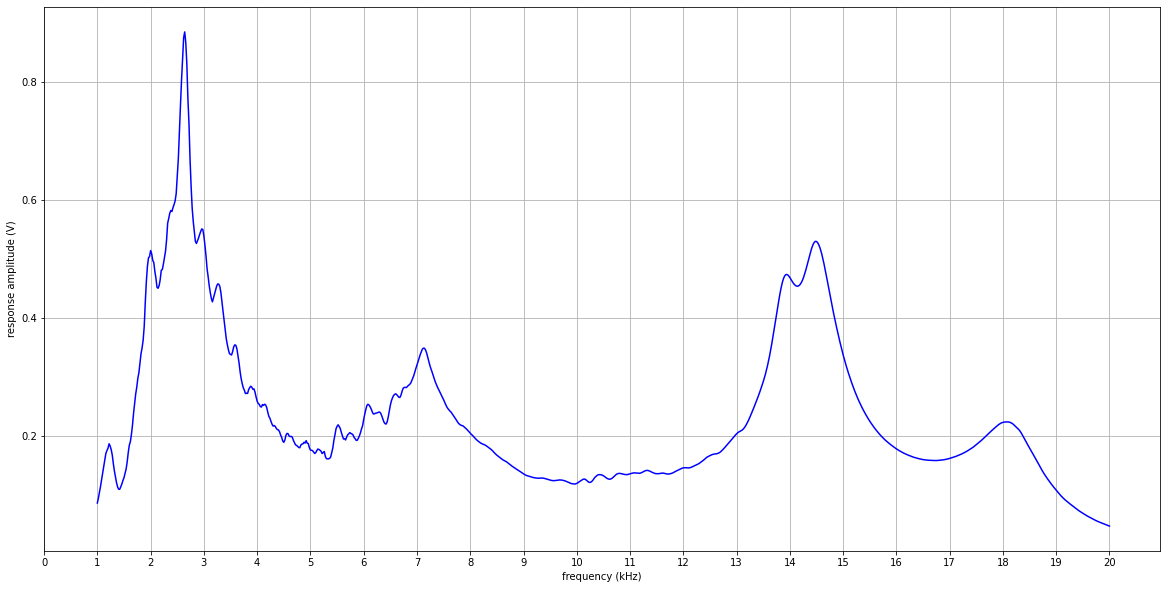

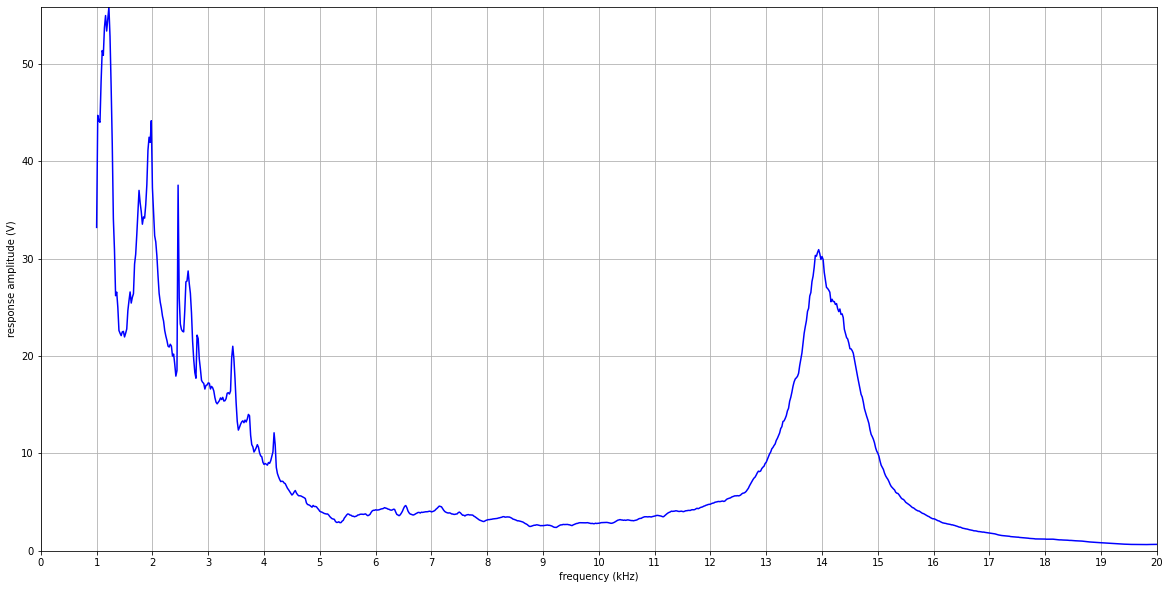

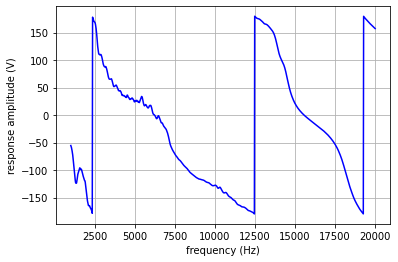

In [127]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


with open('../../data/kagome-01.15.2022-1transducer/data/scppos_1_-1.pkl', 'rb') as f:
    data = pickle.load(f)

with open('../../data/kagome-01.15.2022-1transducer/data/noMetamaterial3.pkl', 'rb') as f:
    ref = pickle.load(f)


freq = data[:,0]
amplitude = data[:,1]
phase = data[:,2]


normFactor = ref[:,1]



plt.figure(figsize=(20,10))
plt.plot(freq/1000, amplitude, 'b-')
#plt.axis([0, 20, 0, 0.2])
plt.xlabel("frequency (kHz)")
plt.ylabel("response amplitude (V)")
plt.xticks(np.linspace(0, 20, 21))
plt.grid()
plt.savefig("../../data/kagome-01.15.2022-1transducer/figures/1_-1_amp.png")

plt.figure(figsize=(20,10))
plt.plot(freq/1000, amplitude/normFactor, 'b-')
plt.axis([4, 20, 0, max(amplitude/normFactor)])
plt.xlabel("frequency (kHz)")
plt.ylabel("response amplitude (V)")
plt.xticks(np.linspace(0, 20, 21))
plt.grid()


plt.figure()
plt.plot(freq, phase, 'b-')
#plt.axis([0, 20000, 0, 0.25])
plt.xlabel("frequency (Hz)")
plt.ylabel("response amplitude (V)")
plt.grid()
plt.savefig("../../data/kagome-01.15.2022-1transducer/figures/1_-1_phase.png")

In [29]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.linspace(1,2,2).astype(int)
print(b)
print(a[np.linspace(1,2,2).astype(int),:])

print(np.linspace(1,76,76))
print(np.linspace(77,77+50,51))
print(np.linspace(77+51,77+51+5,6))

[1 2]
[[4 5 6]
 [7 8 9]]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76.]
[ 77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127.]
[128. 129. 130. 131. 132. 133.]
